In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs                                                                           
#import cartopy.feature as cfeature


plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 35 #22

In [2]:
datasitx = xr.open_dataset('D:/EOF/prec_monthly_1948-2016.nc')
datasit=datasitx.rolling(time=6, center=True).mean(skipna=True)
#datasit=datasitx.rolling(time=6).mean(skipna=True)
rata=datasit.data.mean(dim='time',skipna=True)
datasit

C:\ProgramData\anaconda3\lib\site-packages\xarray\coding\times.py:150: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:  (time: 828, lon: 1440, lat: 600)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2016-12-01
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
Data variables:
    data     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Jan 11 11:29:20 2021: cdo -s -f nc4 -z zip import_binar...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [3]:
#datasit['month'] = datasitx.index.month

In [4]:
datasit['data'][5][0][:]

<xarray.DataArray 'data' (lon: 1440)>
array([47.419228, 47.22905 , 47.031387, ..., 45.527863, 46.288452,
       47.06002 ], dtype=float32)
Coordinates:
    time     datetime64[ns] 1948-06-01
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    lat      float32 -59.88
Attributes:
    long_name:  The data

In [5]:
datasitx['data'][100][0][:]

<xarray.DataArray 'data' (lon: 1440)>
array([64.2392  , 63.53808 , 62.83696 , ..., 59.448177, 61.504807, 63.561436],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1956-05-01
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    lat      float32 -59.88
Attributes:
    long_name:  The data

In [6]:
#rata=datasit.data.mean()

In [7]:
#rata

Text(0.5, 1.0, 'Mean of Precipitation in The World')

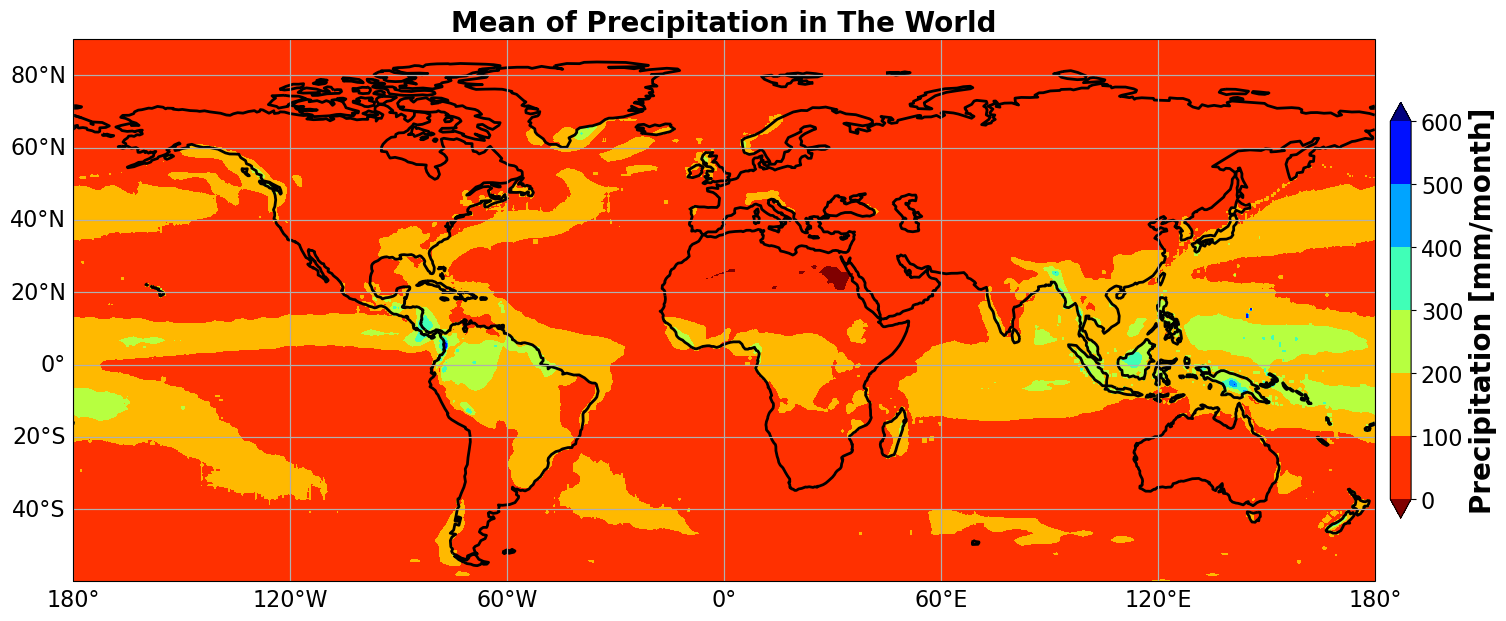

In [14]:
plt.figure(figsize=(20,9))
#plt.subplot(211)
#ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines(resolution='110m')
ax.gridlines()
fill=rata.plot.contourf(ax=ax, extend='both', add_colorbar=False, cmap='jet_r')
cb = plt.colorbar(fill, orientation='vertical', shrink=0.6, pad=0.01)
cb.set_label('Precipitation [mm/month]', fontsize=20, fontweight='bold')
ax.coastlines(alpha=1,lw=2)
gl=ax.gridlines(draw_labels=True, alpha=1)
gl.top_labels=False
gl.bottom_labels=True
gl.right_labels=False
gl.left_labels=True
ax.set_title('Mean of Precipitation in The World', fontsize=20, fontweight='bold')

In [11]:
ds_climo = datasit.data.groupby('time.month').mean('time')

Text(0.45, 0.92, 'Monthly Climatology in The World')

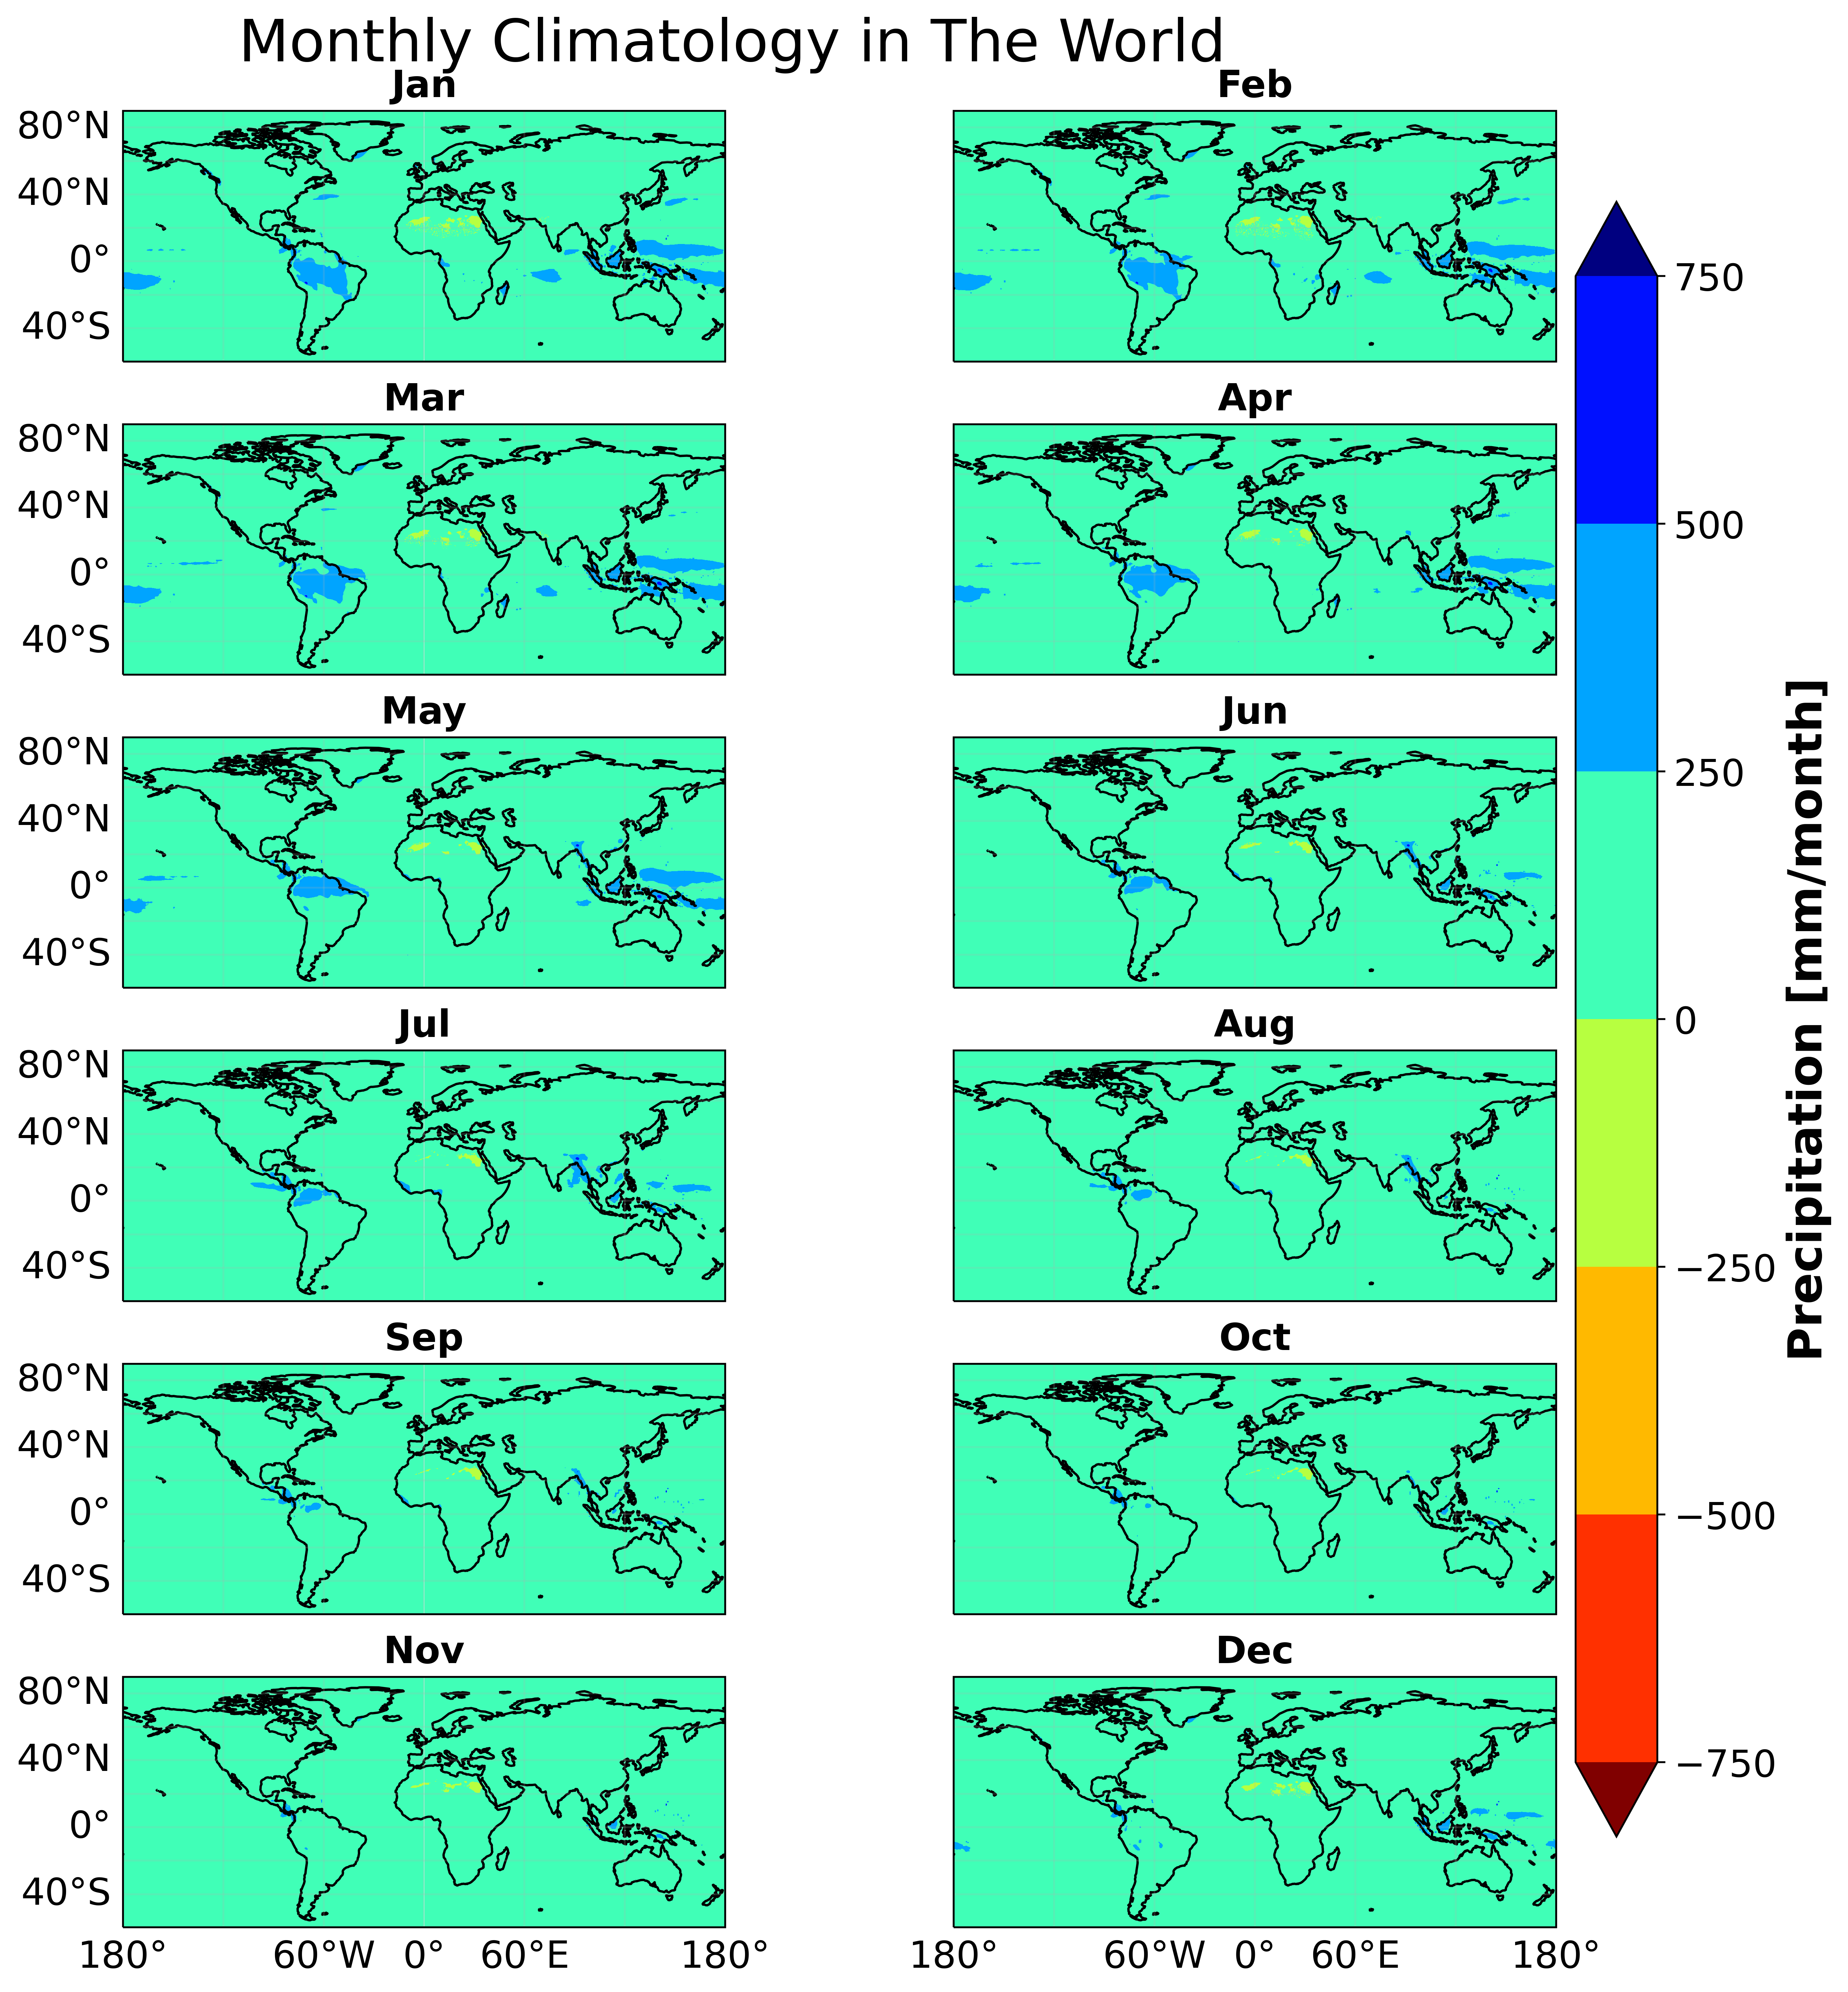

In [13]:


plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.weight': 'light'})

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=6, dpi=500, figsize=[15,14], gridspec_kw={'hspace': 0.25, 'wspace': 0.02})

axes_flatted = axes.flat
season_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cmap = colors.LinearSegmentedColormap.from_list("", ["red","white","blue"])

#cvals  = [-1., -0.5, 1.]
#colors = ["blue","white","red"]
#norm=plt.Normalize(min(cvals),max(cvals))
#tuples = list(zip(map(norm,cvals), colors))
#cmap = mapcol.LinearSegmentedColormap.from_list("", tuples)

for i in range(len(ds_climo)):
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.2)
    if i==0:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=True
    if i==1:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=False
    if i==2:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=True

    if i==3:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=False

    if i==4:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=True

    if i==5:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=False

    if i==6:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=True

    if i==7:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=False

    if i==8:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=True

    if i==9:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=False

    if i==10:
        gl.top_labels=False
        gl.bottom_labels=True
        gl.right_labels=False
        gl.left_labels=True

    if i==11:
        gl.top_labels=False
        gl.bottom_labels=True
        gl.right_labels=False
        gl.left_labels=False

    #levels = np.linspace(-1.5,1.5,7)
    #im=season_2018be[i].plot.contourf(ax=axes_flatted[i],levels=levels,  extend='both', add_colorbar=False, cmap=cmap)
    im=ds_climo[i].plot.contourf(ax=axes_flatted[i], extend='both', add_colorbar=False, cmap='jet_r')

    axes_flatted[i].coastlines(alpha=1)#,lw=2)
    axes_flatted[i].set_title(season_order[i],y=1, fontsize=16,fontweight='bold')
#axes.sharex(True)
cbar =  fig.colorbar(im, ax=axes,  shrink=0.9, pad=0.01)
cbar.set_label('Precipitation [mm/month]', fontsize=20, fontweight='bold')
fig.suptitle('Monthly Climatology in The World', fontsize=25 , y=0.92, x=0.45)
#fig.subplots_adjust(top=0.96)

In [13]:
ds_anoms = (datasit.data.groupby('time.month') - ds_climo)
season_ds_anoms = ds_anoms.groupby('time.season').sum()

Text(0.45, 1.06, 'Season Anomaly 2015')

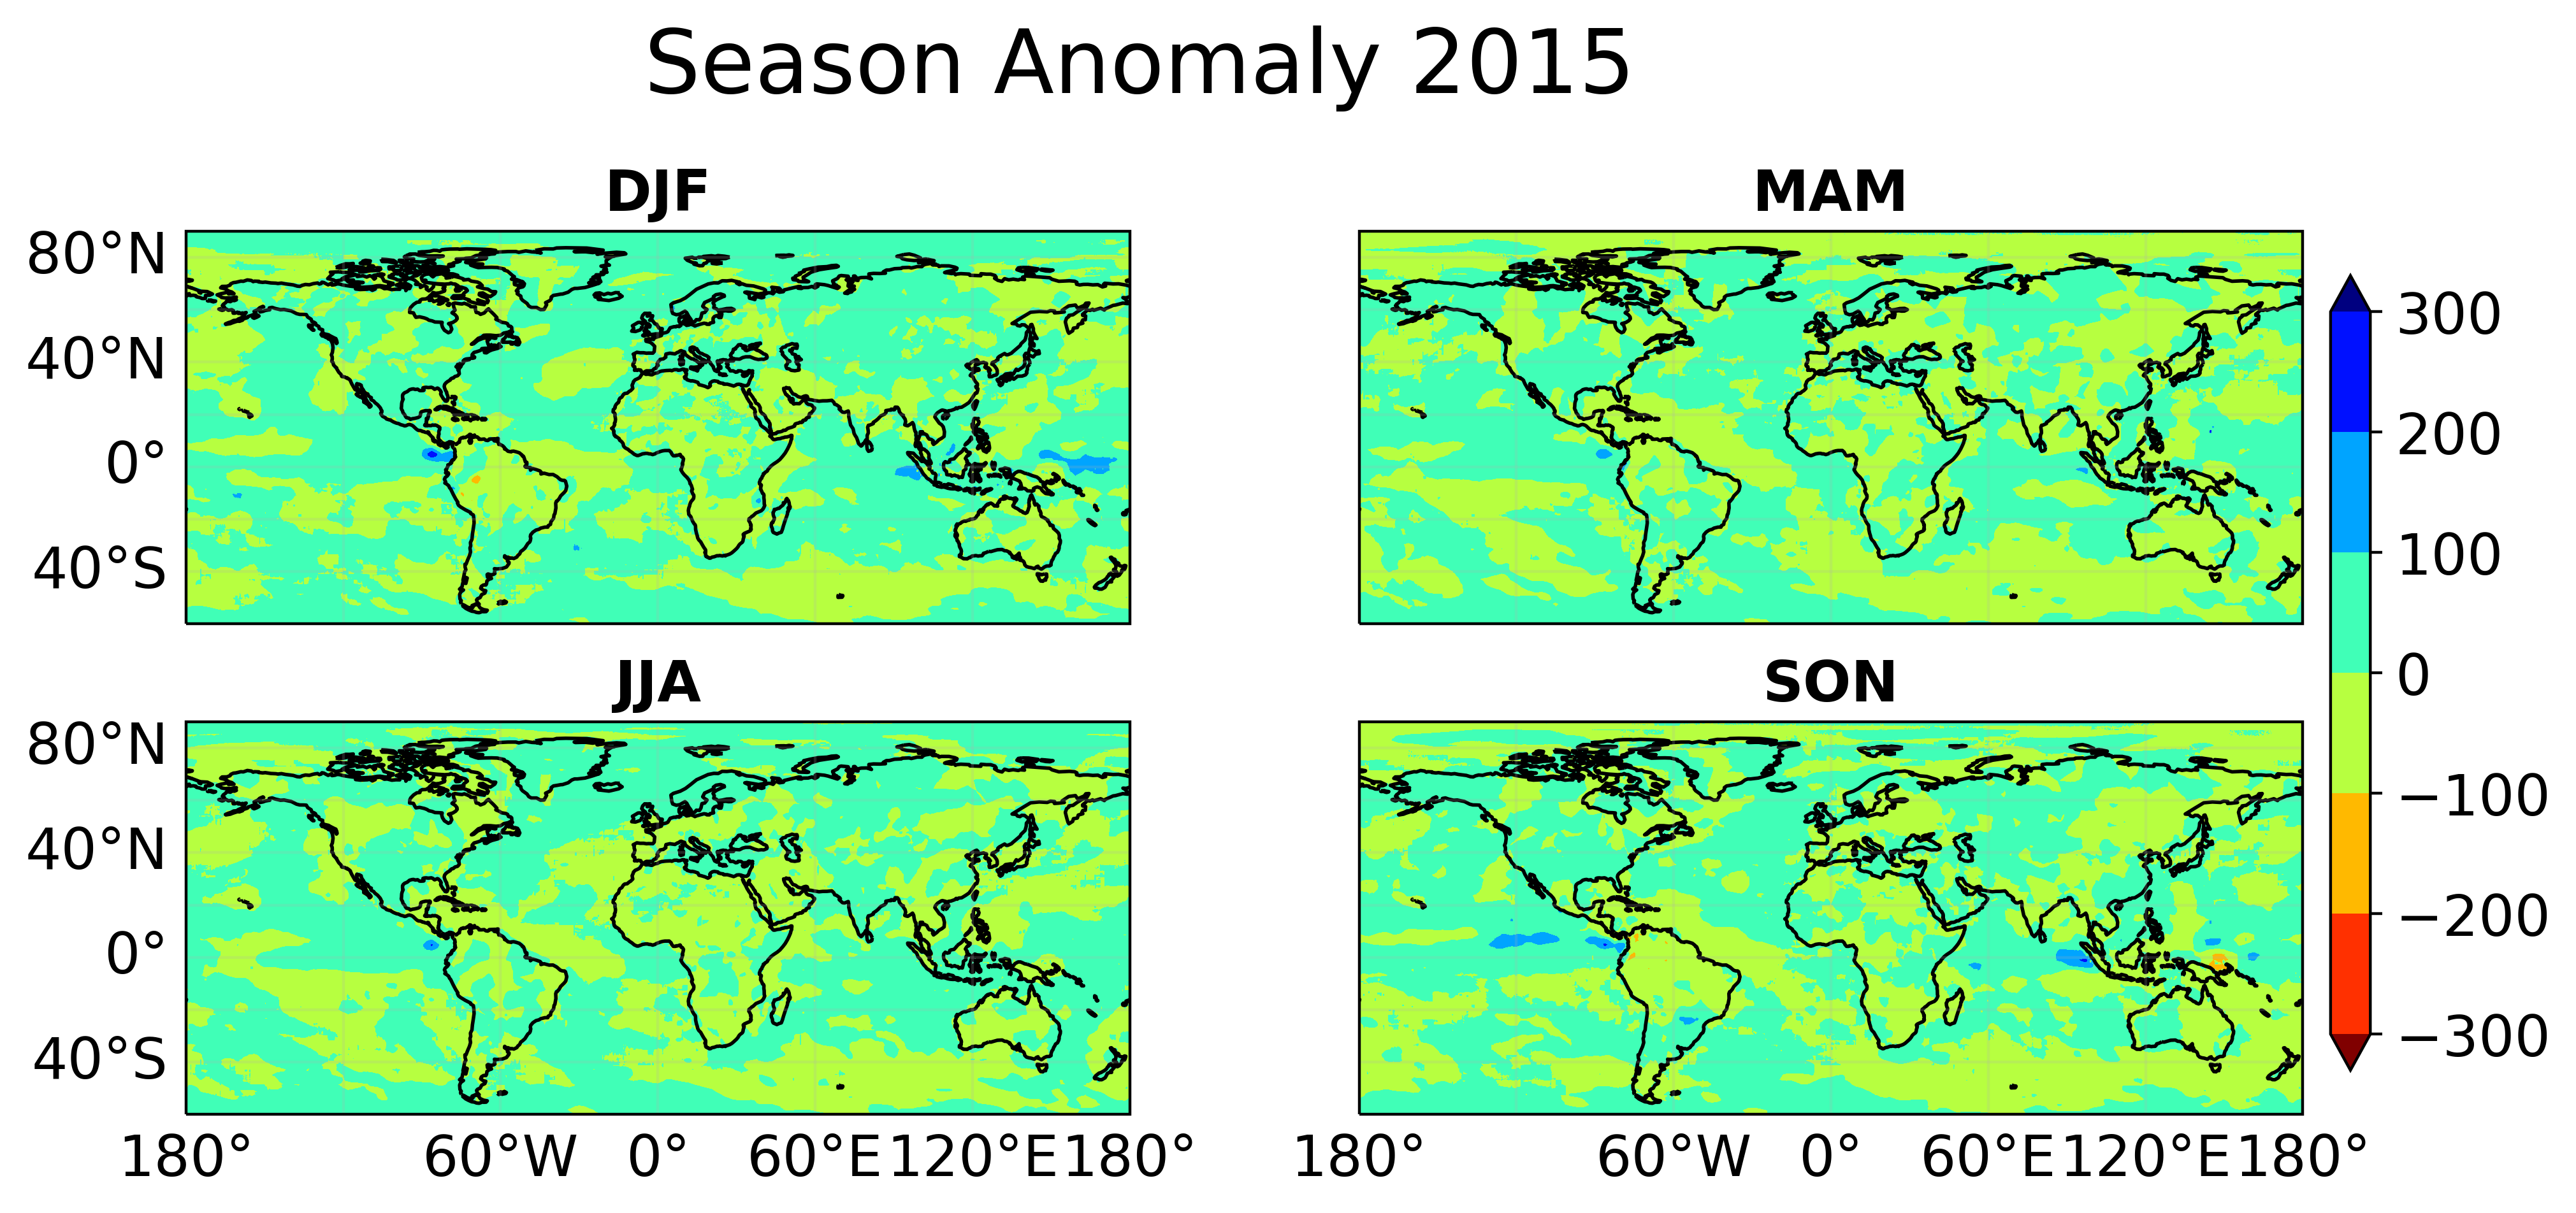

In [14]:
tahun='2015'
ds_anomsx=(ds_anoms.sel(time=tahun)).groupby('time.season').mean('time')

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.weight': 'light'})

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=2, dpi=400, figsize=[14,4.5], gridspec_kw={'hspace': 0.25, 'wspace': 0.02})

axes_flatted = axes.flat
season_order = ['DJF', 'MAM', 'JJA', 'SON']
cmap = colors.LinearSegmentedColormap.from_list("", ["red","white","blue"])

#cvals  = [-1., -0.5, 1.]
#colors = ["blue","white","red"]
#norm=plt.Normalize(min(cvals),max(cvals))
#tuples = list(zip(map(norm,cvals), colors))
#cmap = mapcol.LinearSegmentedColormap.from_list("", tuples)

for i in range(len(ds_anomsx)):
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.2)
    if i==0:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=True
    if i==1:
        gl.top_labels=False
        gl.bottom_labels=False
        gl.right_labels=False
        gl.left_labels=False
    if i==2:
        gl.top_labels=False
        gl.bottom_labels=True
        gl.right_labels=False
        gl.left_labels=True

    if i==3:
        gl.top_labels=False
        gl.bottom_labels=True
        gl.right_labels=False
        gl.left_labels=False

    #levels = np.linspace(-1.5,1.5,7)
    #im=season_2018be[i].plot.contourf(ax=axes_flatted[i],levels=levels,  extend='both', add_colorbar=False, cmap=cmap)
    im=ds_anomsx[i].plot.contourf(ax=axes_flatted[i], extend='both', add_colorbar=False, cmap='jet_r')

    axes_flatted[i].coastlines(alpha=1)#,lw=2)
    axes_flatted[i].set_title(season_order[i],y=1, fontsize=16,fontweight='bold')
#axes.sharex(True)
cbar =  fig.colorbar(im, ax=axes,  shrink=0.9, pad=0.01)
#cbar.set_label('Precipitation [mm/month]', fontsize=20, fontweight='bold')
fig.suptitle('Season Anomaly '+ tahun, fontsize=25 , y=1.06, x=0.45)

# =============================================================

# =============================================================